In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 1.2 MB 33.1 MB/s 
     |████████████████████████████████| 186 kB 49.7 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 317 kB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

In [4]:
def optimize(f, mse, params, speed, time, iterations, learning_rate):
  x = params
  for _  in range(iterations):
    preds = f(time, params)
    loss = mse(preds, speed)

    loss.backward()

    x.data -= x.grad.data*learning_rate
    x.grad = None
  
  return x

In [5]:
def f(t, params):
  a, b, c = params
  return a*(t**2) + (b*t) + c

In [6]:
def mse(preds, target): return ((preds - target)**2).mean().sqrt()

In [7]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

In [8]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

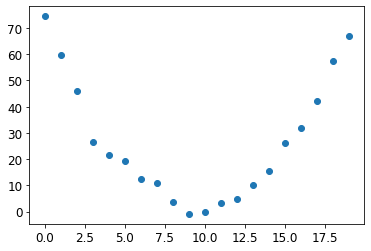

In [9]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [28]:
params = torch.randn(3, requires_grad=True)
orig_params = params.clone()

In [29]:
preds = f(time, params)

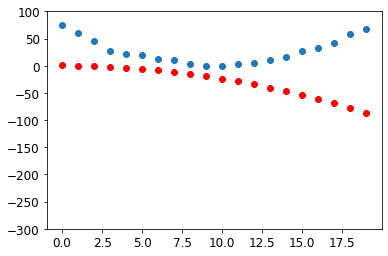

In [30]:
show_preds(preds)

In [31]:
optimize(f, mse, params, speed, time, 1000, 1e-5)

tensor([ 0.1367, -0.0261,  0.5312], requires_grad=True)

In [14]:
orig_params

tensor([-0.7658, -0.7506,  1.3525], grad_fn=<CloneBackward>)

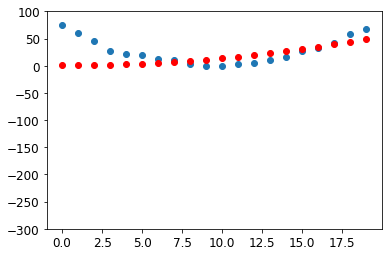

In [32]:
show_preds(f(time, params))